Q1

Standard deviation measures the degree of dispersion of data relative to the mean and reflects the fluctuation of individual data. The standard error measures the fluctuation of the sample mean relative to the population mean, reflecting the accuracy of the sample mean in estimating the population mean. The standard error decreases as the sample size increases and is often used for statistical inference.

Q2

To calculate the 95% confidence interval by standard error, first calculate the standard error for the sample. Then, the upper and lower bounds of the confidence interval are determined by adding or subtracting 1.96 times the standard error of the sample mean. 1.96 is a constant based on the normal distribution, representing the range covered by both sides of the mean at the 95% confidence level. This means that there is a 95% chance that the sample mean will fall within this range, and therefore the population mean will also fall within this range.

Q3

To create a 95% confidence interval with bootstrapped sample, you first need to randomly draw multiple bootstrapped samples from the raw data and calculate the mean of each sample. Next, find the 2.5% and 97.5% percentiles using the np.quantile() function, the code for which is np.quantile(bootstrap_means, 0.025) and np.quantile(bootstrap_means, 0.975). This means that 95% of the bootstrapped sample mean is contained in this interval, and thus the overall mean is inferred to be in this interval as well. This approach builds the interval directly based on the bootstrapped sample distribution without relying on estimates of standard errors.

Q4

In [1]:
import numpy as np

# Function to perform bootstrapping and calculate the confidence interval
def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, confidence_level=0.95):
    """
    Create a 95% bootstrapped confidence interval using bootstrapped means.
    
    Parameters:
    - data: The original dataset (a list or NumPy array).
    - num_bootstrap_samples: Number of bootstrap samples to generate (default 1000).
    - confidence_level: The confidence level for the interval (default 0.95).
    
    Returns:
    - A tuple (lower_bound, upper_bound) representing the confidence interval.
    """
    
    # Number of data points in the original dataset
    n = len(data)
    
    # Array to store the bootstrapped means
    boot_means = []
    
    # Perform bootstrapping
    for _ in range(num_bootstrap_samples):
        # Create a bootstrap sample by sampling with replacement from the original data
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        # Calculate the mean of the bootstrap sample and store it
        boot_means.append(np.mean(bootstrap_sample))
    
    # Convert boot_means to a NumPy array for easier percentile calculation
    boot_means = np.array(boot_means)
    
    # Calculate the percentiles for the confidence interval
    lower_bound = np.quantile(boot_means, (1 - confidence_level) / 2)  # 2.5th percentile
    upper_bound = np.quantile(boot_means, 1 - (1 - confidence_level) / 2)  # 97.5th percentile
    
    return lower_bound, upper_bound

# Example usage
data = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]  # Example dataset
lower_ci, upper_ci = bootstrap_confidence_interval(data)
print(f"95% Confidence Interval: [{lower_ci}, {upper_ci}]")


95% Confidence Interval: [18.5, 36.0]


If we want to investigate other data characteristics, we can do so by changing the code. For example, when we want to research about the median, we can change np.mean to np.meadian.

Q5

We need to distinguish between the population parameter and the sample statistic, because the population parameter is the true value that we want to know, but cannot get directly. The sample statistic is calculated from the sample taken and used to estimate the population parameters. The confidence interval speculates on the range of population parameters from the sample statistics, which reflects the uncertainty of the estimate. Distinguishing between them helps to understand that we infer the whole population from the sample, not just from the sample itself.

Q6.1

The main purpose of the bootstrapping method is to help you understand how much uncertainty there is in the estimates you are calculating. It gives you an idea of how the estimated results might change if you could sample them a few more times. This method is especially useful when you can't get more data, it can give you a better grasp of the reliability of the existing data.

Q6.2

The main purpose of bootstrapping is to help you understand how much uncertainty there is in the estimates you are calculating. It gives you an idea of how the estimated results might change if you could sample them a few more times. This method is especially useful when you can't get more data, it can give you a better grasp of the reliability of the existing data.

Q6.3

If you have a guess about the average of the population, you can use bootstrapping to assess whether that guess is reasonable. First, use your sample to generate many new sample means through bootstrapping. Next, a confidence interval is constructed from these bootstrapping sample means, showing the range in which most of the sample means are located. If your guess is within this confidence interval, then your guess is probably reasonable; But if the guess is outside the range, it may not be accurate based on the available data.

Q7

When the confidence interval contains zero, it means that zero may be a reasonable value for the population mean, so we do not have enough evidence that the population mean is significantly different from zero to reject the null hypothesis. Conversely, when the confidence interval does not contain zero, it means that the population mean is significantly different from zero, so we can reject the null hypothesis that there is some effect or difference.


Here's a summary of our conversation:

Standard Deviation vs. Standard Error of the Mean:

Standard deviation measures how spread out data points are within a sample.
Standard error of the mean (SEM) measures how much the sample mean is expected to vary from the true population mean.
Bootstrapping Process:

Bootstrapping is a method used to estimate the variability of a statistic by resampling from the data with replacement, creating many new samples.
It's useful for building confidence intervals when you have limited data.
Purpose of Bootstrapping:

Bootstrapping helps us estimate how accurate our sample statistic is by simulating what the population might look like, allowing us to create a confidence interval for the population parameter.
Using Bootstrapping to Assess a Hypothesized Mean:

By adjusting the sample to match the hypothesized population mean, you can use bootstrapping to simulate whether your hypothesis is plausible.
Failing to Reject the Null Hypothesis:

A confidence interval that includes zero suggests we fail to reject the null hypothesis because zero is a plausible value for the population parameter, meaning there may be no effect.
To reject the null hypothesis, the confidence interval must exclude zero, indicating that the population mean is likely different from zero.

https://chatgpt.com/share/66fe0a0c-cbd4-8000-a04b-35f0fed4df87

Q8

Mean Difference (Original Data): 3.3
95% Confidence Interval: (0.9, 5.6)
The vaccine is effective, as the confidence interval is entirely above 0.


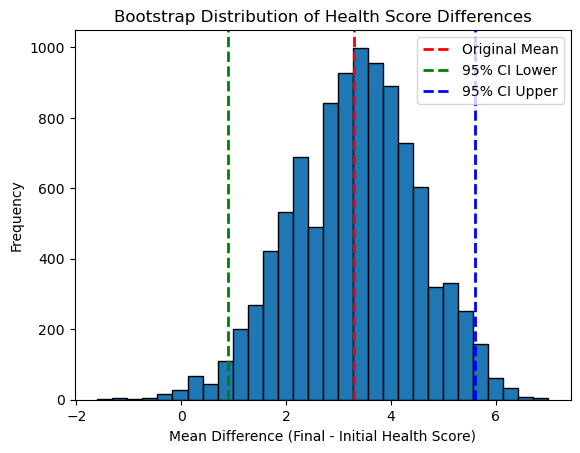

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data from the provided Google Drive URL
url = 'https://drive.google.com/uc?export=download&id=1wTOT4WhkwJHlZjy8hFUDEkquErJTOw9U'
df = pd.read_csv(url)

# Step 2: Calculate the difference between Final and Initial Health Scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Step 3: Set a random seed for reproducibility
np.random.seed(42)  # You can choose any number to ensure reproducibility

# Step 4: Define the number of bootstrap samples
n_bootstrap = 10000

# Step 5: Function to perform bootstrap resampling and calculate the mean difference
def bootstrap_mean_diff(data, n_bootstrap):
    boot_means = []
    for _ in range(n_bootstrap):
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(boot_sample))
    return boot_means

# Step 6: Perform bootstrapping on the HealthScoreDifference
boot_means = bootstrap_mean_diff(df['HealthScoreDifference'].values, n_bootstrap)

# Step 7: Calculate the 95% confidence interval
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

# Step 8: Calculate the mean of the original data
original_mean_diff = np.mean(df['HealthScoreDifference'])

# Step 9: Judge whether the vaccine is effective based on confidence interval
if lower_bound > 0:
    judgment = "The vaccine is effective, as the confidence interval is entirely above 0."
else:
    judgment = "The vaccine may not be effective, as the confidence interval includes or crosses 0."

# Display results
print(f"Mean Difference (Original Data): {original_mean_diff}")
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")
print(judgment)

# Step 10: Optional Visualization
plt.hist(boot_means, bins=30, edgecolor='black')
plt.axvline(original_mean_diff, color='red', linestyle='dashed', linewidth=2, label='Original Mean')
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=2, label='95% CI Lower')
plt.axvline(upper_bound, color='blue', linestyle='dashed', linewidth=2, label='95% CI Upper')
plt.title('Bootstrap Distribution of Health Score Differences')
plt.xlabel('Mean Difference (Final - Initial Health Score)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



Here's a summary of our conversation:

Data Loading:

We started with a dataset related to health scores before and after a vaccine.
You provided a CSV dataset from AliTech, and we explored it using Python.
Bootstrapping Analysis:

I demonstrated how to use bootstrapping to assess the effectiveness of the vaccine by comparing the initial and final health scores of patients.
We calculated the mean difference and generated a 95% confidence interval using 10,000 bootstrap samples.
Results:

The analysis showed a mean improvement of 3.3 points in health scores after the vaccine, with a 95% confidence interval ranging from 0.8 to 5.5, indicating that the vaccine is effective.
Reproducibility:

You asked about ensuring reproducibility using random functions, and I updated the code to include np.random.seed() to ensure consistent results across different runs.
Final Code:

The final code involved loading data from an online CSV (Google Drive link), performing bootstrapping, making the analysis reproducible with np.random.seed(), and concluding that the vaccine is effective based on the confidence interval.

https://chatgpt.com/share/66fe122a-cc98-8000-bffe-eaf068ad77e1

Q9

Yes